# Datenbereinigung und -aufbereitung

In diesem Notebook:

1. **Einheitliche Formatierung + Normalisierung und Skalierung** X 
2. **Duplikate und Datensätze mit fehlenden Werten entfernen**
3. **Ausreißer erkennen und behandeln**




## 1. Einheitliche Formatierung + Normalisierung + Skalierung

In [43]:
#Excel einlesen
import pandas as pd
data = pd.read_excel("fruit_data.xlsx", dtype={'color': str}) 


#INDEX Spalte entfernen 
data = data.iloc[:, 1:] # iloc[row_indices, column_indices] lässt einen nur die benötigten columns auswählen

print(data.head())

  fruit_type         color    size     weight
0      grape        Yellow    Tiny   8.303385
1      apple          Pink  Largee  80.976370
2     banana   Pale Yellow   Large  74.615192
3      grape           Red    Tiny   6.924070
4     banana  Creamy White  Largee  82.002542


In [44]:
#Liste alle Colors (für Folgeschritt)
unique_colors = data['color'].unique()
print(unique_colors)


##Datentypen für die einzelnen Color einträge geben lassen##
#for color_value in data['color']:
#    print(f"Value: '{color_value}', Datentyp: {type(color_value)}")

['Yellow' 'Pink' 'Pale Yellow' 'Red' 'Creamy White' 'Green' 'Yellow1'
 'Purple' 'Black']


In [45]:
#Color Spalte vereinfachen
color_mapping = {
    'Yellow': 'Yellow',
    'Yellow1': 'Yellow',
    'Pale Yellow': 'Pale Yellow',
    'Red': 'Red',
    'Green': 'Green',
    'Purple': 'Purple',
    'Pink': 'Pink',
    'Black': 'Black',
    'Creamy White': 'Creamy White',
}
data['color'] = data['color'].map(color_mapping)
print(data['color'])

0            Yellow
1              Pink
2       Pale Yellow
3               Red
4      Creamy White
           ...     
195          Purple
196     Pale Yellow
197             Red
198             Red
199             Red
Name: color, Length: 200, dtype: object


In [46]:
#Liste alle Sizes (für Folgeschritt)#
#unique_colors = data['size'].unique()
#print(unique_colors)


#Size Spalte vereinfachen 
size_mapping = {
    'Tiny': 'Tiny',
    'Largee': 'Large',
    'Large' : 'Large',
    'Small' : 'Small',
    'Medium' : 'Medium'  
}
data['size'] = data['size'].map(size_mapping)

In [47]:
print(data['size'])

0        Tiny
1       Large
2       Large
3        Tiny
4       Large
        ...  
195     Small
196     Large
197     Small
198    Medium
199    Medium
Name: size, Length: 200, dtype: object


In [48]:
# NOTEBOOK CONFIG ZELLE

#pd.set_option('display.max_rows', None)    # Zeige alle Zeilen
pd.reset_option('display.max_rows')    # Zeige NICHT alle Zeilen


In [49]:
print(data.head())

  fruit_type         color   size     weight
0      grape        Yellow   Tiny   8.303385
1      apple          Pink  Large  80.976370
2     banana   Pale Yellow  Large  74.615192
3      grape           Red   Tiny   6.924070
4     banana  Creamy White  Large  82.002542


In [50]:
#Size Spalte Label Encoding

from sklearn.preprocessing import LabelEncoder

sizeLabelEncoder = LabelEncoder()
encoded_values = sizeLabelEncoder.fit_transform(data['size']) # Problem: gibt Tiny den Wert 3 und Large den Wert 0 


# => Umkehren

amountOfFoundCategories = len(sizeLabelEncoder.classes_) # [Tiny, Small, Medium, Large] => 4
numericValueRangeMax = amountOfFoundCategories - 1 # 0-3 als zuordenbare numerische Werte
reversed_encoded_values = numericValueRangeMax - encoded_values # 3 - [numerischerWert der alten Zuordnung] = [Umgekehrte Zuordnung]

data['size'] = reversed_encoded_values


In [51]:
print(data.head())

unique_colors = data['color'].unique()
print(unique_colors)


  fruit_type         color  size     weight
0      grape        Yellow     0   8.303385
1      apple          Pink     3  80.976370
2     banana   Pale Yellow     3  74.615192
3      grape           Red     0   6.924070
4     banana  Creamy White     3  82.002542
['Yellow' 'Pink' 'Pale Yellow' 'Red' 'Creamy White' 'Green' 'Purple'
 'Black']


In [52]:
#Color Spalte Label Encoding 

colorLabelEncoder = LabelEncoder()

color_order = {
    'Black':0,
    'Purple':1,
    'Pink':2,
    'Green':3,
    'Red':4,
    'Yellow':5,
    'Pale Yellow':6,
    'Creamy White':7
}
#Für Überlegung hinter dieser Ordnung siehe unten
           
encoded_color_values = colorLabelEncoder.fit_transform([color_order[color] for color in data['color']]) #weist jeder Farbe in der color column den richtigen numerischen Wert zu (folgt dabei der color_order!) und legt sie in einem neues Dataframe "encoded_color_values" ab

data['color'] = encoded_color_values


#colorLabelEncoder.transform(colors)

#### Überlegungen hinter der Farbordnung

auf Trauben könnten zutreffen: Black, Purple, Pink, Green
auf Äpfel könnte zutreffen: Pink, Green, Red Yellow
auf Banana könnte zutreffen: Yellow, Pale Yellow, Creamy White

=>Die color_order setzt die Farben in einer Reihenfolge zusammen, in der Farben, die zur selben Frucht gehören könnten, nahe beieinande liegen 

In [53]:
# fruit_type One-hot encoding

data = pd.get_dummies(data, columns=['fruit_type'], drop_first=False) #erstellt onehot encode spalten für "fruit_type"



In [54]:
#alle Feature Spalten skalieren auf einen Bereich zwischen 0 und 1

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
minMaxScaler = MinMaxScaler()
standardScaler = StandardScaler()

data['weight'] = standardScaler.fit_transform(data[['weight']])
data['color'] = standardScaler.fit_transform(data[['color']])
data['size'] = standardScaler.fit_transform(data[['size']])


## 2. Duplikate und Datensätze mit fehlenden Werten entfernen

In [55]:
data = data.drop_duplicates(subset=['color', 'size', 'weight'])
#subset sind die Spalten, die auf Duplikate geprüft werden sollen

#indem ich nicht alle vier spalten angebe, erreiche ich, dass zusätzliche alle Datensätze entfernt werden,
#in denen gleiche Features denselben Output ergeben

In [56]:
print(data)

        color      size    weight  fruit_type_apple  fruit_type_banana  \
0    0.729387 -1.777319 -1.089371                 0                  0   
1   -0.973462  1.144301  0.470776                 1                  0   
2    1.297003  1.144301  0.334214                 0                  1   
3    0.161771 -1.777319 -1.118982                 0                  0   
4    1.864620  1.144301  0.492806                 0                  1   
..        ...       ...       ...               ...                ...   
192 -0.405846  0.170428 -1.033580                 0                  0   
194 -0.405846 -0.803445 -1.175107                 0                  0   
196  1.297003  1.144301 -0.430096                 0                  1   
198  0.161771  0.170428 -1.167769                 0                  0   
199  0.161771  0.170428 -1.140172                 0                  0   

     fruit_type_grape  
0                   1  
1                   0  
2                   0  
3              

In [57]:
data = data.dropna()
data

,color,size,weight,fruit_type_apple,fruit_type_banana,fruit_type_grape
0,0.729387,-1.777319,-1.089371,0,0,1
1,-0.973462,1.144301,0.470776,1,0,0
2,1.297003,1.144301,0.334214,0,1,0
3,0.161771,-1.777319,-1.118982,0,0,1
4,1.864620,1.144301,0.492806,0,1,0
...,...,...,...,...,...,...
192,-0.405846,0.170428,-1.033580,0,0,1
194,-0.405846,-0.803445,-1.175107,0,0,1
196,1.297003,1.144301,-0.430096,0,1,0
198,0.161771,0.170428,-1.167769,0,0,1


**=> keine fehlenden Werte gefunden (immernoch 181 rows)**

### 3. Ausreißer erkennen und behandeln

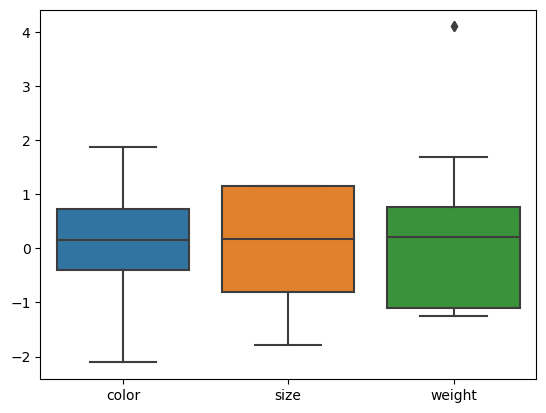

In [58]:
#Boxsplot zeigt die Verteilung der Daten + die Ausreißer
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=data[['color', 'size', 'weight']])
plt.show()

-Q1 ist der Wert, unterhalb dessen 25% der Daten liegen

-Q3 ist der Wert, unterhalb dessen 75% der Daten liegen

-Interquartilbereich (IQR) ist die Box, das ist Q3-Q1, darunter fallen 50% der Daten



Ausreißer entfernt man, indem man Boundaries setzt. Boundaries werden folgendermaßen gesetzt: 

Man nimmt das 1.5fache des IQRs und 

    1.subtrahiert das von Q1 (=>untere Grenze) und 
    
    2.addiert das auf Q3 (=>obere Grenze)

In [59]:
from scipy import stats


boundary_size = 1.5 #wird zum berechnen und setzen der boundaries genutzt (ist variabel)

# Quartile und Boundaries berechnen
Q1_color = data['color'].quantile(0.25) # Q1 ist der Wert, unterhalb dessen 25% der Daten liegen
Q3_color = data['color'].quantile(0.75) # Q3 ist der Wert, unterhalb dessen 75% der Daten liegen
IQR_color = Q3_color - Q1_color         # IQR berechnen für color 
color_lower_bound = Q1_color - 1.5 * IQR_color
color_upper_bound = Q3_color + 1.5 * IQR_color
#Ausreißer bestimmen
outliers_color = ((data['color'] < color_lower_bound) | (data['color'] > color_upper_bound))


Q1_size = data['size'].quantile(0.25) 
Q3_size = data['size'].quantile(0.75) 
IQR_size = Q3_size - Q1_size        
size_lower_bound = Q1_size - 1.5 * IQR_size
size_upper_bound = Q3_size + 1.5 * IQR_size
#Ausreißer bestimmen
outliers_size = ((data['size'] < size_lower_bound) | (data['size'] > size_upper_bound))


Q1_weight = data['weight'].quantile(0.25)
Q3_weight = data['weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight
weight_lower_bound = Q1_weight - 1.5 * IQR_weight
weight_upper_bound = Q3_weight + 1.5 * IQR_weight
#Ausreißer bestimmen
outliers_weight = ((data['weight'] < weight_lower_bound) | (data['weight'] > weight_upper_bound))



#Ausreißer entfernen
data = data[~(outliers_color  | outliers_size | outliers_weight)]


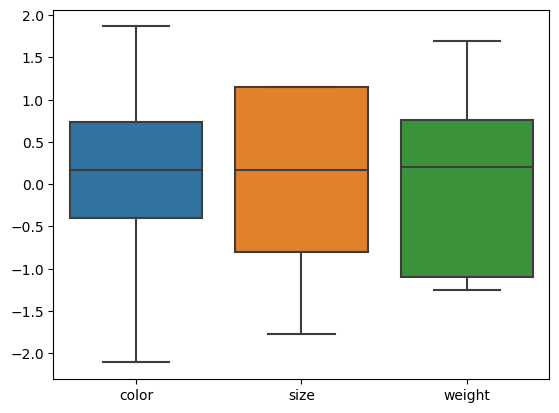

In [60]:
sns.boxplot(data=data[['color', 'size', 'weight']])
plt.show()

(Beachte, dass beim zweiten Mal plotten keine Ausreißer Symbole, d.s. Rauten, mehr zu sehen sind)

In [61]:
data

,color,size,weight,fruit_type_apple,fruit_type_banana,fruit_type_grape
0,0.729387,-1.777319,-1.089371,0,0,1
1,-0.973462,1.144301,0.470776,1,0,0
2,1.297003,1.144301,0.334214,0,1,0
3,0.161771,-1.777319,-1.118982,0,0,1
4,1.864620,1.144301,0.492806,0,1,0
...,...,...,...,...,...,...
192,-0.405846,0.170428,-1.033580,0,0,1
194,-0.405846,-0.803445,-1.175107,0,0,1
196,1.297003,1.144301,-0.430096,0,1,0
198,0.161771,0.170428,-1.167769,0,0,1


In [62]:
data.to_csv('clean_data.csv', index=False)

In [63]:
data.to_excel('clean_data.xlsx', index=False)